## Import Library and Load Dataset

In [1]:
# import library

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv("dataset-training-3label.csv")

In [2]:
data

,no,skin-type,umur,masalah,label
0,1,normal,40,jerawat,normal-jerawat
1,2,normal,36,jerawat,normal-jerawat
2,3,normal,21,jerawat,normal-jerawat
3,4,normal,37,jerawat,normal-jerawat
4,5,normal,39,jerawat,normal-jerawat
...,...,...,...,...,...
1495,1496,sensitif,43,bopeng,sensitif-bopeng
1496,1497,sensitif,29,bopeng,sensitif-bopeng
1497,1498,sensitif,44,bopeng,sensitif-bopeng
1498,1499,sensitif,31,bopeng,sensitif-bopeng


In [3]:
df = data.drop(["no"], axis=1)
df

,skin-type,umur,masalah,label
0,normal,40,jerawat,normal-jerawat
1,normal,36,jerawat,normal-jerawat
2,normal,21,jerawat,normal-jerawat
3,normal,37,jerawat,normal-jerawat
4,normal,39,jerawat,normal-jerawat
...,...,...,...,...
1495,sensitif,43,bopeng,sensitif-bopeng
1496,sensitif,29,bopeng,sensitif-bopeng
1497,sensitif,44,bopeng,sensitif-bopeng
1498,sensitif,31,bopeng,sensitif-bopeng


## Data Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['label'] = le.fit_transform(df['label'])
df['skin-type'] = le.fit_transform(df['skin-type'])
df['masalah'] = le.fit_transform(df['masalah'])

In [5]:
df

,skin-type,umur,masalah,label
0,3,40,1,10
1,3,36,1,10
2,3,21,1,10
3,3,37,1,10
4,3,39,1,10
...,...,...,...,...
1495,4,43,0,12
1496,4,29,0,12
1497,4,44,0,12
1498,4,31,0,12


## Model Development

In [6]:
# prepare training data for building the model
x = df.drop(['label'], axis=1)
y = df['label']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

In [8]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot

In [9]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('svm', SVC()))
    level0.append(('bayes', GaussianNB()))

    # define meta learner model
    level1 = LogisticRegression()

    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

# get a list of models to evaluate
def get_models():
    models = dict()
    models['lr'] = LogisticRegression()
    models['knn'] = KNeighborsClassifier()
    models['cart'] = DecisionTreeClassifier()
    models['svm'] = SVC()
    models['bayes'] = GaussianNB()
    models['stacking'] = get_stacking()
    return models

# evaluate the given model using cross-validation
def evaluate_model(model, x, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(
        model, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores


>lr 0.900 (0.046)
>knn 0.774 (0.032)
>cart 1.000 (0.000)
>svm 0.222 (0.030)
>bayes 1.000 (0.000)
>stacking 1.000 (0.000)


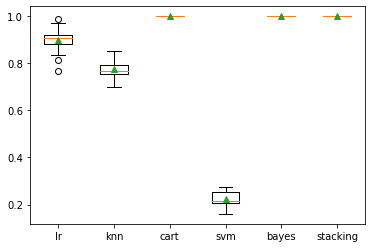

In [10]:
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, x, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
accuracy = (cross_val_score(model,x,y,cv=cv,scoring='accuracy'))
score_accuracy = np.mean(accuracy)

In [12]:
print ("accuracy: ", accuracy)
print ("accuracy: ", score_accuracy)

accuracy:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
accuracy:  1.0


In [13]:
# define the base models
level0 = list()
level0.append(('lr', LogisticRegression()))
level0.append(('knn', KNeighborsClassifier()))
level0.append(('cart', DecisionTreeClassifier()))
level0.append(('svm', SVC()))
level0.append(('bayes', GaussianNB()))

# define meta learner model
level1 = LogisticRegression()

# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)

# fit the model on all available data
model.fit(x_train.values, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('cart', DecisionTreeClassifier()),
                               ('svm', SVC()), ('bayes', GaussianNB())],
                   final_estimator=LogisticRegression())

## Model Evaluation

In [14]:
# predict the x test
predicted = model.predict(x_test)

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Compute performance manually
NewprediksiBenar = (predicted == y_test).sum()
NewprediksiSalah = (predicted != y_test).sum()

print("prediksi benar: ", NewprediksiBenar, " data")
print("prediksi salah: ", NewprediksiSalah, " data")
print("Akurasi Algoritme: ", NewprediksiBenar/(NewprediksiBenar+NewprediksiSalah)*100,"%")

# generate the confusion matrix
cf_matrix = confusion_matrix(y_test, predicted)
print(classification_report(y_test, predicted))

prediksi benar:  450  data
prediksi salah:  0  data
Akurasi Algoritme:  100.0 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        38
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        32
           5       1.00      1.00      1.00        23
           6       1.00      1.00      1.00        34
           7       1.00      1.00      1.00        33
           8       1.00      1.00      1.00        29
           9       1.00      1.00      1.00        27
          10       1.00      1.00      1.00        33
          11       1.00      1.00      1.00        23
          12       1.00      1.00      1.00        32
          13       1.00      1.00      1.00        25
          14       1.00      1.00      1.00        37

    accuracy                           1.00       450


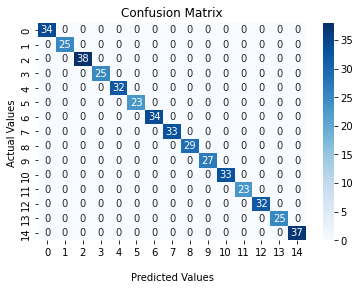

In [17]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

# visualize the confusion matrix
pyplot.show()

## Save the Model

In [18]:
import joblib
joblib.dump(model, "stacking-model.pkl")

['stacking-model.pkl']

## Model Testing

In [19]:
model = joblib.load("stacking-model.pkl")
features = [[12,25,0]]
result = model.predict(features)
label = {
            '0': 'normal-jerawat',
            '1': 'normal-komedo',
            '2': 'normal-bopeng',
            '3': 'berminyak-jerawat',
            '4': 'berminyak-komedo',
            '5': 'berminyak-bopeng',
            '6': 'kering-jerawat',
            '7': 'kering-komedo',
            '8': 'kering-bopeng',
            '9': 'kombinasi-jerawat',
            '10': 'kombinasi-komedo',
            '11': 'kombinasi-bopeng',
            '12': 'sensitif-jerawat',
            '13': 'sensitif-komedo',
            '14': 'sensitif-bopeng',
    }
result = label[str(result[0])]
print(result)

sensitif-jerawat
